In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [2]:
import gc


## Objectives
This is to predict credit default of American Express [amex-kaggle-competition](https://www.kaggle.com/competitions/amex-default-prediction). Since the data is large for kaggle notebook, we will downsample the data to fit in the memory (16GB) by reading the first 20000 data points

## Loading and Exploratory Data Analysis

In [3]:
train_data = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv', nrows=20000)
train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')
data = pd.merge(train_data, train_labels, how='inner', left_on=['customer_ID'], right_on=['customer_ID'])

In [4]:
# clean up memory
del train_labels
del train_data
gc.collect()

70

<AxesSubplot:>

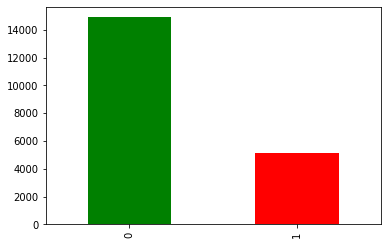

In [5]:
data.target.value_counts().plot.bar(color=['green', 'red'])

The data is slightly skewed

In [6]:
pd.options.display.max_rows = 4000

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,19851.0,0.659791,0.243801,-2.569212e-01,0.480397,0.699095,0.868872,1.009926
D_39,20000.0,0.152223,0.268263,8.701630e-07,0.004582,0.009219,0.214144,5.009303
B_1,20000.0,0.128426,0.218512,-1.414690e-01,0.008930,0.033051,0.131177,1.323981
B_2,19998.0,0.609829,0.404588,8.675709e-06,0.088689,0.813778,1.002129,1.010000
R_1,20000.0,0.076314,0.218224,3.154721e-07,0.002874,0.005768,0.008637,2.502416
S_3,16234.0,0.226424,0.198186,-2.229944e-01,0.127580,0.163368,0.258013,2.493134
D_41,19998.0,0.061444,0.197778,6.841272e-07,0.002930,0.005773,0.008675,4.564871
B_3,19998.0,0.139009,0.242552,2.607369e-06,0.005337,0.009994,0.174748,1.371231
D_42,2823.0,0.174130,0.182384,1.347037e-04,0.046092,0.123501,0.251824,2.556439
D_43,13762.0,0.155740,0.213712,9.070750e-06,0.041568,0.084330,0.182876,3.088172


Feature scale is quite good, not much features have max > 100

In [8]:
data.head().T

,0,1,2,3,4
customer_ID,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
S_2,2017-03-09,2017-04-07,2017-05-28,2017-06-13,2017-07-16
P_2,0.938469,0.936665,0.95418,0.960384,0.947248
D_39,0.001733,0.005775,0.091505,0.002455,0.002483
B_1,0.008724,0.004923,0.021655,0.013683,0.015193
B_2,1.006838,1.000653,1.009672,1.0027,1.000727
R_1,0.009228,0.006151,0.006815,0.001373,0.007605
S_3,0.124035,0.12675,0.123977,0.117169,0.117325
D_41,0.008771,0.000798,0.007598,0.000685,0.004653
B_3,0.004709,0.002714,0.009423,0.005531,0.009312


Drop `S_2` date columns and columns with NA > 75%

In [9]:
data.drop(['S_2'], axis=1, inplace=True)

In [10]:
mask = data.isnull().mean() > 0.75

In [11]:
data.drop(data.columns[mask], axis=1, inplace=True)

In [12]:
data.shape

(20000, 167)

Int & float columns

In [13]:
mask_int = data.dtypes == int
int_cols = data.columns[mask_int]
print(int_cols)

Index(['B_31', 'target'], dtype='object')


In [14]:
mask_float = data.dtypes == float
float_cols = data.columns[mask_float]
print(float_cols)

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_130', 'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=162)


## One Hot Encoding

Categorical columns for one hot encoding 

In [15]:
mask = data.dtypes == object
mask['customer_ID'] = False
categorical_cols = data.columns[mask]
print(categorical_cols)

Index(['D_63', 'D_64'], dtype='object')


In [16]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

small_num_ohc_cols.sum()

8

In [17]:
data['D_63'].value_counts()

CO    14848
CR     3209
CL     1766
XZ      108
XM       36
XL       33
Name: D_63, dtype: int64

In [18]:
data['D_64'].value_counts()

O     11126
U      5280
R      2746
-1      122
Name: D_64, dtype: int64

In [19]:
num_ohc_cols

D_63    6
D_64    4
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [21]:
%%time
# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()
for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data[col]).astype(int)
    
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_cat_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data.index, 
                          columns=col_names)
    
    # Append the new data to the dataframe
    data = pd.concat([data, new_df], axis=1)
    
    # Remove the original column from the dataframe
    data = data.drop(col, axis=1)

CPU times: user 99.9 ms, sys: 27.6 ms, total: 128 ms
Wall time: 127 ms


In [22]:
data.head().T

,0,1,2,3,4
customer_ID,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
P_2,0.938469,0.936665,0.95418,0.960384,0.947248
D_39,0.001733,0.005775,0.091505,0.002455,0.002483
B_1,0.008724,0.004923,0.021655,0.013683,0.015193
B_2,1.006838,1.000653,1.009672,1.0027,1.000727
R_1,0.009228,0.006151,0.006815,0.001373,0.007605
S_3,0.124035,0.12675,0.123977,0.117169,0.117325
D_41,0.008771,0.000798,0.007598,0.000685,0.004653
B_3,0.004709,0.002714,0.009423,0.005531,0.009312
D_43,NaN,NaN,NaN,NaN,NaN


## NAN Value

For non categorical data, there is nan value in the data, hence we need to fill it or drop the entire observation before we feed into our linear model. Let's fill with mean value

In [23]:
for col in data.columns:
    if col in int_cols or col in float_cols:
        mean_value = data[col].mean()
        print('Filling NAN of {} with mean value of {}'.format(col, mean_value))
        data[col].fillna(value=mean_value, inplace=True)

Filling NAN of P_2 with mean value of 0.6597912750755061
Filling NAN of D_39 with mean value of 0.15222257832929187
Filling NAN of B_1 with mean value of 0.12842649663514347
Filling NAN of B_2 with mean value of 0.6098291372160711
Filling NAN of R_1 with mean value of 0.07631383677584944
Filling NAN of S_3 with mean value of 0.2264236516958893
Filling NAN of D_41 with mean value of 0.06144383127199815
Filling NAN of B_3 with mean value of 0.139009188099959
Filling NAN of D_43 with mean value of 0.15574036787179987
Filling NAN of D_44 with mean value of 0.12374205776967206
Filling NAN of B_4 with mean value of 0.17963366056495092
Filling NAN of D_45 with mean value of 0.2587793705382291
Filling NAN of B_5 with mean value of 0.08598194918091695
Filling NAN of R_2 with mean value of 0.04433265013860604
Filling NAN of D_46 with mean value of 0.4746816890464209
Filling NAN of D_47 with mean value of 0.4189520043795902
Filling NAN of D_48 with mean value of 0.3859295482807024
Filling NAN of 

## Train Validation Test Split

Let's split the data into train, validation and test set. We will train and crossvalidation the data on train,validation set and test our price prediction on test set. The measure of error will be mean square error

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y_col = 'target'
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
X_data = X_data.drop(['customer_ID'], axis=1)
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)

<AxesSubplot:>

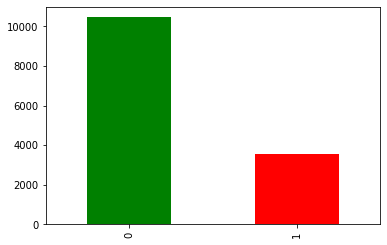

In [26]:
y_train.value_counts().plot.bar(color=['green', 'red'])

## Baseline: Simple Linear Regression

No feature scaling as the max(features) ~300, we can try scaling later

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=42, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [29]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [30]:
l2_preds = l2_model.predict(X_test)

In [31]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [33]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.8855,
 'recall': array([0.93160271, 0.75541401]),
 'precision': array([0.91487475, 0.79650772]),
 'f1score': array([0.92316296, 0.7754168 ])}

In [34]:
cf = confusion_matrix(y_test, l2_preds)

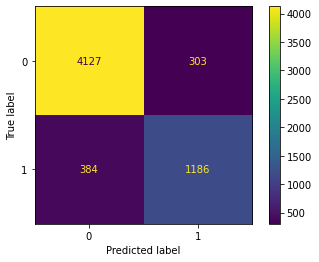

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=l2_model.classes_)
disp.plot()